In [1]:
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.cluster import KMeans


In [2]:
movies_df= pd.read_csv("final_dataset.csv")
print(movies_df.columns)
X = movies_df.drop(['Unnamed: 0','score', 'star', 'star_net_worth', 'title'], axis=1)
y = movies_df['score']

ratings = [
    (X['rating'] == 'R'),
    (X['rating'] == 'PG-13'),
    (X['rating'] == 'PG'),
    (X['rating'] == 'G'),
    (X['rating'] == 'Not Rated'),
    (X['rating'] == 'Unrated'),
    (X['rating'] == 'NC-17'),
    (X['rating'] == 'TV-MA'),
    (X['rating'] == 'Approved'),
    (X['rating'] == 'X'),
    ]

values = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

X['ratingId'] = np.select(ratings, values)


genres = [
    (X['genre'] == 'Comedy'),
    (X['genre'] == 'Action'),
    (X['genre'] == 'Drama'),
    (X['genre'] == 'Crime'),
    (X['genre'] == 'Adventure'),
    (X['genre'] == 'Biography'),
    (X['genre'] == 'Animation'),
    (X['genre'] == 'Horror'),
    (X['genre'] == 'Fantasy'),
    (X['genre'] == 'Mystery'),
    (X['genre'] == 'Sci-Fi'),
    (X['genre'] == 'Romance'),
    (X['genre'] == 'Thriller'),
    (X['genre'] == 'Family'),
    (X['genre'] == 'Western'),
    ]

values = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']

X['genreId'] = np.select(genres, values)

celebrity_ratings = [
    (X['movie_star_rating'] == 'A'),
    (X['movie_star_rating'] == 'B'),
    (X['movie_star_rating'] == 'C'),
    (X['movie_star_rating'] == 'D')
]

values = ['4','3','2','1']
X['movieStarId'] = np.select(celebrity_ratings, values)

X = X.drop(['rating', 'genre', 'movie_star_rating'], axis=1)


    

Index(['Unnamed: 0', 'title', 'rating', 'genre', 'score', 'star', 'budget',
       'runtime', 'star_net_worth', 'movie_star_rating'],
      dtype='object')


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [5]:
prediction_df = pd.DataFrame(columns=['budget', 'runtime', 'ratingId', 'genreId', 'movieStarId'])
prediction_df.loc[0] = ['111000000','108','3', '7', '3']

y_pred = regressor.predict(X_test)
print(y_pred)

[5.85490714 4.7210506  6.86064167 ... 6.37915    4.4129     6.599     ]


In [9]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.66 degrees.
Accuracy: 88.75 %.


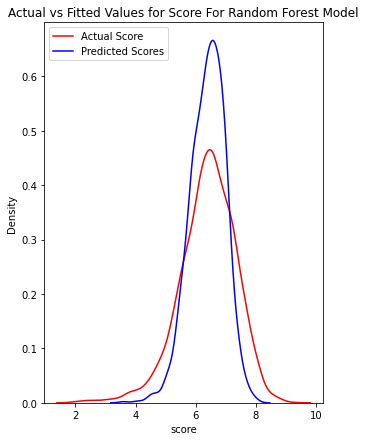

In [12]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Score")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Scores" , ax=ax)


plt.title('Actual vs Fitted Values for Score For Random Forest Model')

plt.legend()

plt.show()
plt.close()